In [ ]:
# 外接矩形
import cv2

src = cv2.imread("explode1.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
# 取得外接矩形,格式為元組(tuple)
rect = cv2.boundingRect(contours[0])
# 列出外接矩形的所有細項
x, y, w, h = rect
print(f"左上角 x = {x}, 左上角 y = {y}")
print(f"矩形寬度 = {w}")
print(f"矩形高度 = {h}")
dst = cv2.rectangle(src, (x, y), (x+w, y+h), (0, 255, 255), 2)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


左上角 x = 66, 左上角 y = 39
矩形寬度 = 178
矩形高度 = 100


In [2]:
# 外接矩形
import cv2
import numpy as np

src = cv2.imread("explode2.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
box = cv2.minAreaRect(contours[0])      # 取得最小外接矩形
print(f"最小外接矩形的中心點、寬、高、旋轉角度 = \n {box}")
points = cv2.boxPoints(box)             # 找出頂點座標
points = np.int32(points)               # 轉為整數
# 調整頂點格式
print(f"轉換後的矩形頂角 = \n {points}")
dst = cv2.drawContours(src, [points], 0, (0, 255, 0), 2)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


最小外接矩形的中心點、寬、高、旋轉角度 = 
 ((154.83755493164062, 88.25508880615234), (91.39300537109375, 174.26780700683594), 56.449337005615234)
轉換後的矩形頂角 = 
 [[ 56  98]
 [202   2]
 [252  78]
 [107 174]]


In [2]:
# 外接圓
import cv2

src = cv2.imread("explode3.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
circle = cv2.minEnclosingCircle(contours[0])        # 取得最小外接圓
print(f"最小外接圓的圓心、半徑 = \n {circle}")
(x, y), radius = circle
center = (int(x), int(y))                           # 圓中心座標取整數
radius = int(radius)                                # 圓半徑取整數
dst = cv2.circle(src, center, radius, (0, 255, 255), 2) # 繪製最小外接圓
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


最小外接圓的圓心、半徑 = 
 ((152.2089080810547, 123.05834197998047), 90.02757263183594)


In [3]:
# 橢圓擬合
import cv2

src = cv2.imread("cloud.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_SIMPLE)
ellipse = cv2.fitEllipse(contours[0])           # 取得擬合橢圓
print(f"擬合橢圓的內容 = {ellipse}")
print(f"擬合橢圓的資料型態 = {type(ellipse)}")
print(f"橢圓中心點 = {ellipse[0]}")
print(f"長短軸直徑 = {ellipse[1]}")
print(f"旋轉角度 = {ellipse[2]}")
dst = cv2.ellipse(src, ellipse, (0, 255, 0), 2) # 繪製擬合橢圓
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


擬合橢圓的內容 = ((226.74420166015625, 139.14651489257812), (131.7815399169922, 326.1377868652344), 70.7343978881836)
擬合橢圓的資料型態 = <class 'tuple'>
橢圓中心點 = (226.74420166015625, 139.14651489257812)
長短軸直徑 = (131.7815399169922, 326.1377868652344)
旋轉角度 = 70.7343978881836


In [1]:
# 外接三角形
import cv2
import numpy as np

src = cv2.imread("heart.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
area, triangle = cv2.minEnclosingTriangle(contours[0])  # 取得外接三角形
print(f"三角形面積 = {area}")
print(f"三角形頂點座標資料類型 = {type(triangle)}")
print(f"三角頂點座標 = \n{triangle}")
triangle = np.int32(triangle)                           # 轉整數
dst = cv2.line(src, tuple(triangle[0][0]),
               tuple(triangle[1][0]), (0, 255, 0), 2)
dst = cv2.line(src, tuple(triangle[1][0]),
               tuple(triangle[2][0]), (0, 255, 0), 2)
dst = cv2.line(src, tuple(triangle[0][0]),
               tuple(triangle[2][0]), (0, 255, 0), 2)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


三角形面積 = 15638.060546875
三角形頂點座標資料類型 = <class 'numpy.ndarray'>
三角頂點座標 = 
[[[361.3784   115.48649 ]]

 [[ 63.809917  35.371902]]

 [[176.73334  170.88    ]]]


In [2]:
# 多邊形近似
import cv2

src = cv2.imread("multiple.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
n = len(contours)                                   # 輪廓數量
src1 = src.copy()                                   # 複製src影像
src2 = src.copy()                                   # 複製src影像
for i in range(n):
    approx = cv2.approxPolyDP(contours[i], 3, True) # epsilon = 3
    dst1 = cv2.polylines(src1, [approx], True, (0, 255, 0), 2)  # dst1
    approx = cv2.approxPolyDP(contours[i], 15, True)    # epsilon = 15
    dst2 = cv2.polylines(src2, [approx], True, (0, 255, 0), 2)  # dst2
cv2.imshow("dst1: epsilon = 3", dst1)
cv2.imshow("dst2: epsilon = 15", dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
# 直線擬合
import cv2

src = cv2.imread("unregular.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
rows, cols = src.shape[:2]
vx, vy, x, y =cv2.fitLine(contours[0], cv2.DIST_L2, 0, 0.01, 0.01)
# 從陣列中讀取數值，避免警告
vx = vx.item()
vy = vy.item()
x = x.item()
y = y.item()
print(f"共線正規化向量 = {vx}, {vy}")
print(f"直線經過的點 = {x}, {y}")
lefty = int((-x * vy / vx) + y)         #左邊點的y座標
righty = int(((cols - x) * vy / vx) + y)    # 右邊點的y座標
dst = cv2.line(src, (0, lefty), (cols-1, righty), (0, 255, 0), 2)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


共線正規化向量 = 0.9303163886070251, -0.36675795912742615
直線經過的點 = 165.3821563720703, 96.8993148803711


In [2]:
# 凸包
import cv2

src = cv2.imread("heart1.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
hull = cv2.convexHull(contours[0])                      # 找出凸包點
dst = cv2.polylines(src, [hull], True, (0, 255, 0), 2)  # 把凸包連線
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# 凸包
import cv2

src = cv2.imread("hand1.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
hull = cv2.convexHull(contours[0])                      # 找出凸包點
dst = cv2.polylines(src, [hull], True, (0, 255, 0), 2)  # 把凸包連線
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
# 凸包-計算手勢的凸包面積
import cv2

src = cv2.imread("hand1.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
hull = cv2.convexHull(contours[0])                      # 找出凸包點
dst = cv2.polylines(src, [hull], True, (0, 255, 0), 2)  # 把凸包連線
cv2.imshow("dst", dst)
convex_area = cv2.contourArea(hull)
print(f"凸包面積 = {convex_area}")
cv2.waitKey(0)
cv2.destroyAllWindows()

凸包面積 = 53848.0


In [1]:
# 凸包-找出手勢的多層凸包
import cv2

src = cv2.imread("hand2.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
n = len(contours)
for i in range(n):
    hull = cv2.convexHull(contours[i])
    dst = cv2.polylines(src, [hull], True, (0, 255, 0), 2)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# 凸缺陷
import cv2

src = cv2.imread("star.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]                                   # 輪廓
hull = cv2.convexHull(contour, returnPoints=False)      # 獲得凸包
defects = cv2.convexityDefects(contour, hull)           # 獲得凸包缺陷
print(f"{defects}")
n = defects.shape[0]                                    # 缺陷數量
print(f"缺陷數量 = {n}")
for i in range(n):
    # s是startPoint, e是endPoint, f是farPoint, d是depth
    s, e, f, d = defects[i, 0]
    start = tuple(contour[s][0])                        # 取得startPoint座標
    end = tuple(contour[e][0])                          # 取得endPoint座標
    far = tuple(contour[f][0])                          # 取得farPoint座標
    dst = cv2.line(src, start, end, [0, 0, 255], 2)         # 凸包連線
    dst = cv2.circle(src, far, 3, [0, 0, 255], -1)      # 繪製farPoint
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[[ 186    0  187 7834]]

 [[   0   33   32 7753]]

 [[  33   86   54 7689]]

 [[  86  132  109 7936]]

 [[ 132  186  164 7812]]]
缺陷數量 = 5


In [1]:
# 測試輪廓是否為凸形
import cv2

src = cv2.imread("heart1.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
src1 = src.copy()                                           # 複製src影像
hull = cv2.convexHull(contours[0])                          # 獲得凸包頂點座標
dst1 = cv2.polylines(src1, [hull], True, (0, 255, 0), 2)    # 把凸包連線
cv2.imshow("dst1", dst1)
isConvex = cv2.isContourConvex(hull)                        # 是否凸形
print(f"凸包是凸形 = {isConvex}")
src2 = src.copy()                                           # 複製src影像
approx = cv2.approxPolyDP(contours[0], 10, True)            # epsilon=10
dst2 = cv2.polylines(src2, [approx], True, (0, 255, 0), 2)  # 近似多邊形連線
cv2.imshow("dst2 - epsilon = 10", dst2)
isConvex = cv2.isContourConvex(approx)                      # 是否凸形
print(f'近似多邊形是凸形 = {isConvex}')
cv2.waitKey(0)
cv2.destroyAllWindows()


凸包是凸形 = True
近似多邊形是凸形 = False


In [ ]:
# 計算影像任一點到輪廓之間距離
import cv2

src = cv2.imread("heart1.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
hull = cv2.convexHull(contours[0])                              # 獲得凸包頂點座標
dst = cv2.polylines(src, [hull], True, (0, 255, 0), 2)          # 將凸包連線
# print(hull)    # 可以用這個指令了解凸包座標點

# 點在凸包線上
pointa = (231, 85)                                              # 點在凸包線上
dist_a = cv2.pointPolygonTest(hull, pointa, True)               # 檢測距離
font = cv2.FONT_HERSHEY_SIMPLEX
pos_a = (236, 95)                                               # 文字輸出位置
dst = cv2.circle(src, pointa, 3, [0, 0, 255], -1)               # 用圓標記點 A
cv2.putText(dst, 'A', pos_a, font, 1, (0, 255, 255), 2)         # 輸出文字 A
print(f"dist_a = {dist_a}")

# 點在凸包內
pointb = (150, 100)                                             # 點在凸包內
dist_b = cv2.pointPolygonTest(hull, pointb, True)               # 檢測距離
font = cv2.FONT_HERSHEY_SIMPLEX
pos_b = (160, 110)                                              # 文字輸出位置
dst = cv2.circle(src, pointb, 3, [0, 0, 255], -1)               # 用圓標記點 B
cv2.putText(dst, 'B', pos_b, font, 1, (255, 0, 0), 2)           # 輸出文字 B
print(f"dist_b = {dist_b}")

# 點在凸包外
pointc = (80, 85)                                               # 點在凸包外
dist_c = cv2.pointPolygonTest(hull, pointc, True)               # 檢測距離
font = cv2.FONT_HERSHEY_SIMPLEX
pos_c = (50, 95)                                                # 文字輸出位置
dst = cv2.circle(src, pointc, 3, [0, 0, 255], -1)               # 用圓標記點 C
cv2.putText(dst, 'C', pos_c, font, 1, (255, 0, 255), 2)         # 輸出文字 C
print(f"dist_c = {dist_c}")

cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

dist_a = -0.0
dist_b = 35.65165808180456
dist_c = -16.829141392239833


In [1]:
# 計算影像任一點到輪廓之間距離
import cv2

src = cv2.imread("heart1.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
hull = cv2.convexHull(contours[0])                              # 獲得凸包頂點座標
dst = cv2.polylines(src, [hull], True, (0, 255, 0), 2)          # 將凸包連線
# print(hull)    # 可以用這個指令了解凸包座標點

# 點在凸包線上
pointa = (231, 85)                                              # 點在凸包線上
dist_a = cv2.pointPolygonTest(hull, pointa, False)               # 檢測距離
font = cv2.FONT_HERSHEY_SIMPLEX
pos_a = (236, 95)                                               # 文字輸出位置
dst = cv2.circle(src, pointa, 3, [0, 0, 255], -1)               # 用圓標記點 A
cv2.putText(dst, 'A', pos_a, font, 1, (0, 255, 255), 2)         # 輸出文字 A
print(f"dist_a = {dist_a}")

# 點在凸包內
pointb = (150, 100)                                             # 點在凸包內
dist_b = cv2.pointPolygonTest(hull, pointb, False)               # 檢測距離
font = cv2.FONT_HERSHEY_SIMPLEX
pos_b = (160, 110)                                              # 文字輸出位置
dst = cv2.circle(src, pointb, 3, [0, 0, 255], -1)               # 用圓標記點 B
cv2.putText(dst, 'B', pos_b, font, 1, (255, 0, 0), 2)           # 輸出文字 B
print(f"dist_b = {dist_b}")

# 點在凸包外
pointc = (80, 85)                                               # 點在凸包外
dist_c = cv2.pointPolygonTest(hull, pointc, False)               # 檢測距離
font = cv2.FONT_HERSHEY_SIMPLEX
pos_c = (50, 95)                                                # 文字輸出位置
dst = cv2.circle(src, pointc, 3, [0, 0, 255], -1)               # 用圓標記點 C
cv2.putText(dst, 'C', pos_c, font, 1, (255, 0, 255), 2)         # 輸出文字 C
print(f"dist_c = {dist_c}")

cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

dist_a = 0.0
dist_b = 1.0
dist_c = -1.0


In [1]:
# 寬高比
import cv2

src = cv2.imread("explode1.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127,255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(contours[0])           # 建構矩形
dst = cv2.rectangle(src, (x, y), (x+w, y+h), (0, 255, 255), 2)
cv2.imshow("dst", dst)
aspectratio = w / h                                 # 計算寬高比
print(f"寬高比 = {aspectratio}")
cv2.waitKey(0)
cv2.destroyAllWindows()


寬高比 = 1.78


In [2]:
# 輪廓點座標的資料格式
import cv2

src = cv2.imread("explode1.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127,255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]                       # 建立輪廓變數
print(f"資料格式 = {type(cnt)}")
print(f"資料維度 = {cnt.ndim}")
print(f"資料長度 = {len(cnt)}")
for i in range(len(cnt)):
    print(cnt[i])                       # 列印座標點
cv2.waitKey(0)
cv2.destroyAllWindows()


資料格式 = <class 'numpy.ndarray'>
資料維度 = 3
資料長度 = 383
[[186  39]]
[[181  44]]
[[180  44]]
[[174  50]]
[[173  50]]
[[167  56]]
[[166  56]]
[[158  64]]
[[157  64]]
[[156  65]]
[[155  65]]
[[154  64]]
[[153  64]]
[[149  60]]
[[148  60]]
[[144  56]]
[[143  56]]
[[139  52]]
[[138  52]]
[[135  49]]
[[135  50]]
[[134  51]]
[[134  52]]
[[133  53]]
[[133  54]]
[[132  55]]
[[132  56]]
[[131  57]]
[[131  58]]
[[130  59]]
[[130  60]]
[[129  61]]
[[129  62]]
[[128  63]]
[[128  65]]
[[127  66]]
[[127  67]]
[[126  68]]
[[125  68]]
[[124  67]]
[[121  67]]
[[120  66]]
[[118  66]]
[[117  65]]
[[115  65]]
[[114  64]]
[[112  64]]
[[111  63]]
[[109  63]]
[[108  62]]
[[106  62]]
[[105  61]]
[[103  61]]
[[102  60]]
[[100  60]]
[[99 59]]
[[97 59]]
[[96 58]]
[[94 58]]
[[93 57]]
[[90 57]]
[[89 56]]
[[87 56]]
[[86 55]]
[[84 55]]
[[83 54]]
[[81 54]]
[[80 53]]
[[78 53]]
[[77 52]]
[[75 52]]
[[74 51]]
[[72 51]]
[[71 50]]
[[70 50]]
[[71 50]]
[[73 52]]
[[74 52]]
[[77 55]]
[[78 55]]
[[80 57]]
[[81 57]]
[[83 59]]
[[84 59]]

In [3]:
# 輪廓點座標的資料格式
# 輪廓的極點:最左邊點、最右邊點、最上方點、最下方點
import cv2

src = cv2.imread("explode1.jpg")
cv2.imshow("src", src)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127,255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]                       # 建立輪廓變數
left = cnt[cnt[:, :, 0].argmin()][0]
right = cnt[cnt[:, :, 0].argmax()][0]
top = cnt[cnt[:, :, 1].argmin()][0]
bottom = cnt[cnt[:, :, 1].argmax()][0]
print(f"最左點 = {left}")
print(f"最右點 = {right}")
print(f"最上點 = {top}")
print(f"最下點 = {bottom}")
dst = cv2.circle(src, left, 5, [255, 0, 0], -1)
dst = cv2.circle(src, right, 5, [0, 255, 0], -1)
dst = cv2.circle(src, top, 5, [0, 255, 255], -1)
dst = cv2.circle(src, bottom, 5, [0, 0, 255], -1)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


最左點 = [66 79]
最右點 = [243  99]
最上點 = [186  39]
最下點 = [136 138]


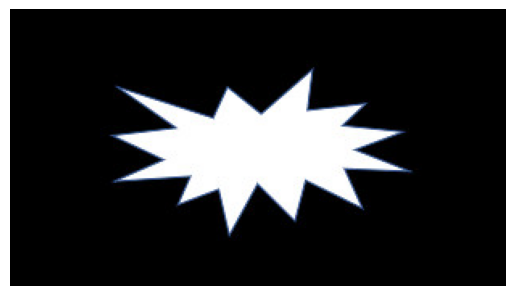

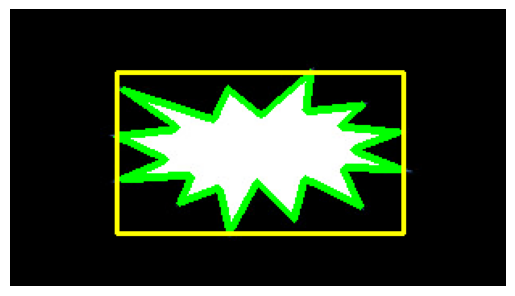

Extent = 0.4125561797752809


In [ ]:
# Extent-輪廓面積/包圍輪廓的矩形面積
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("explode1.jpg")
cv2.imshow("src", src)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
dst = cv2.drawContours(src, contours, -1, (0, 255, 0), 3)       # 繪製輪廓
con_area = cv2.contourArea(contours[0])                         # 輪廓面積
x, y, w, h = cv2.boundingRect(contours[0])                      # 建構矩形
dst = cv2.rectangle(src, (x, y), (x+w, y+h), (0, 255, 255), 2)
cv2.imshow("dst", dst)
plt.axis("off")
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()
square_area = w * h                                             # 計算矩形面積
extent = con_area / square_area                                 # 計算Extent
print(f"Extent = {extent}")
cv2.waitKey(0)
cv2.destroyAllWindows()


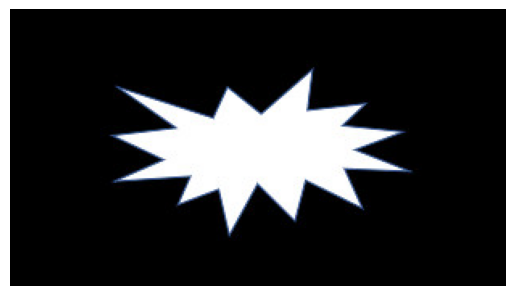

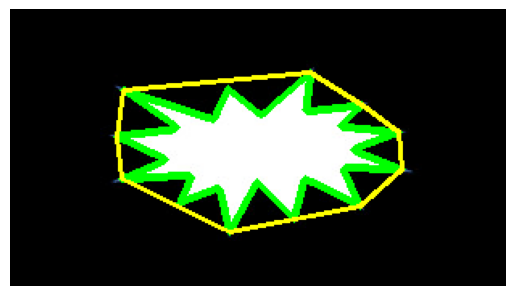

Solidity = 0.5604014041514042


In [2]:
# Solidity-輪廓面積/包圍輪廓的凸包面積
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("explode1.jpg")
cv2.imshow("src", src)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
dst = cv2.drawContours(src, contours, -1, (0, 255, 0), 3)       # 繪製輪廓
con_area = cv2.contourArea(contours[0])                         # 輪廓面積
hull = cv2.convexHull(contours[0])                              # 獲得凸包頂點座標
dst = cv2.polylines(src, [hull], True, (0, 255, 255), 2)        # 將凸包連線
cv2.imshow("dst", dst)
plt.axis("off")
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()
convex_area = cv2.contourArea(hull)                             # 凸包面積
solidity = con_area / convex_area                               # 計算Solidity
print(f"Solidity = {solidity}")
cv2.waitKey(0)
cv2.destroyAllWindows()


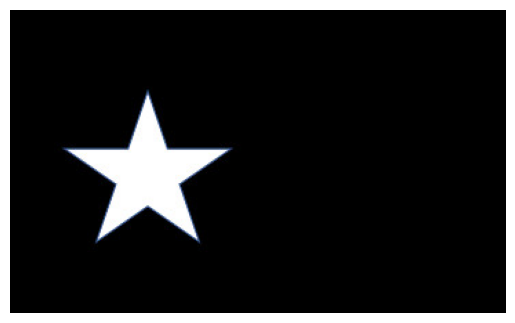

等效直徑 = 70.62067187961067


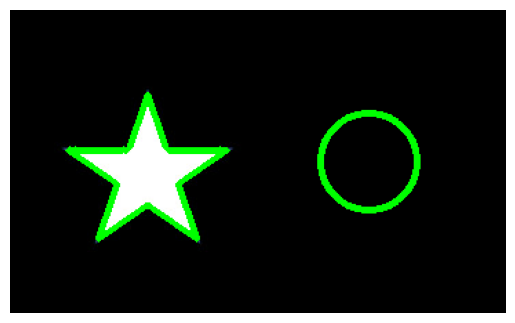

In [1]:
# 等效直徑-與輪廓面積相等的圓型的直徑
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread("star1.jpg")
cv2.imshow("src", src)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
dst = cv2.drawContours(src, contours, -1, (0, 255, 0), 3)       # 繪製輪廓
con_area = cv2.contourArea(contours[0])                         # 輪廓面積
ed = np.sqrt(4 * con_area / np.pi)                              # 計算等效直徑
print(f"等效直徑 = {ed}")
dst = cv2.circle(src, (260, 110), int(ed/2), (0, 255, 0), 3)
cv2.imshow("dst", dst)
plt.axis("off")
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()


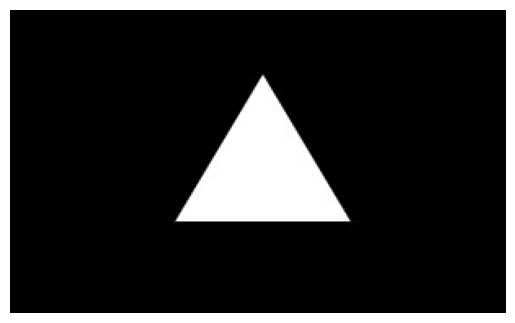

空心像素點長度 = 282, 實心像素點長度 = 4835
空心像素點
[[ 41 154]
 [ 41 155]
 [ 42 154]
 [ 42 156]
 [ 43 153]
 [ 43 156]
 [ 44 152]
 [ 44 157]
 [ 45 152]
 [ 45 157]
 [ 46 151]
 [ 46 158]
 [ 47 151]
 [ 47 158]
 [ 48 150]
 [ 48 159]
 [ 49 149]
 [ 49 160]
 [ 50 149]
 [ 50 160]
 [ 51 148]
 [ 51 161]
 [ 52 148]
 [ 52 161]
 [ 53 147]
 [ 53 162]
 [ 54 146]
 [ 54 163]
 [ 55 146]
 [ 55 163]
 [ 56 145]
 [ 56 164]
 [ 57 145]
 [ 57 164]
 [ 58 144]
 [ 58 165]
 [ 59 143]
 [ 59 166]
 [ 60 143]
 [ 60 166]
 [ 61 142]
 [ 61 167]
 [ 62 142]
 [ 62 167]
 [ 63 141]
 [ 63 168]
 [ 64 140]
 [ 64 169]
 [ 65 140]
 [ 65 169]
 [ 66 139]
 [ 66 170]
 [ 67 139]
 [ 67 170]
 [ 68 138]
 [ 68 171]
 [ 69 137]
 [ 69 172]
 [ 70 137]
 [ 70 172]
 [ 71 136]
 [ 71 173]
 [ 72 136]
 [ 72 173]
 [ 73 135]
 [ 73 174]
 [ 74 134]
 [ 74 175]
 [ 75 134]
 [ 75 175]
 [ 76 133]
 [ 76 176]
 [ 77 133]
 [ 77 176]
 [ 78 132]
 [ 78 177]
 [ 79 131]
 [ 79 178]
 [ 80 131]
 [ 80 178]
 [ 81 130]
 [ 81 179]
 [ 82 130]
 [ 82 179]
 [ 83 129]
 [ 83 180]
 [ 84 128]
 [ 84 1

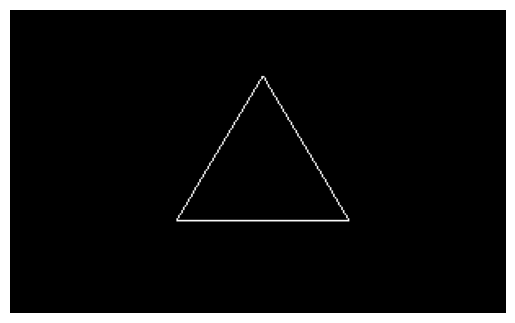

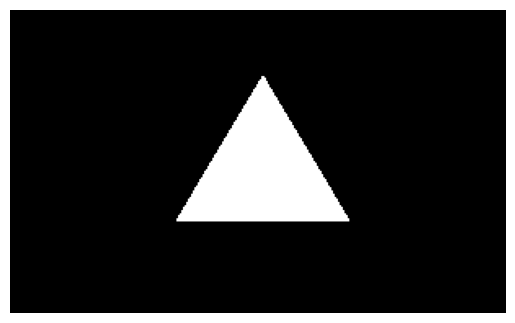

In [2]:
# 非0像素點座標資料
# 使用Numpy的nonzero()函式
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread("simple.jpg")
cv2.imshow("src", src)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]                                     # 取得輪廓數據
mask1 = np.zeros(src_gray.shape, np.uint8)            # 建立畫布
dst1 = cv2.drawContours(mask1, [cnt], 0, 255, 1)      # 繪製空心輪廓
points1 = np.transpose(np.nonzero(dst1))
mask2 = np.zeros(src_gray.shape, np.uint8)            # 建立畫布
dst2 = cv2.drawContours(mask2, [cnt], 0, 255, -1)     # 繪製實心輪廓
points2 = np.transpose(np.nonzero(dst2))

print(f"空心像素點長度 = {len(points1)}, 實心像素點長度 = {len(points2)}")
print("空心像素點")
print(points1)
print("實心像素點")
print(points2)
cv2.imshow("dst1", dst1)
plt.axis("off")
plt.imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imshow("dst2", dst2)
plt.axis("off")
plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()


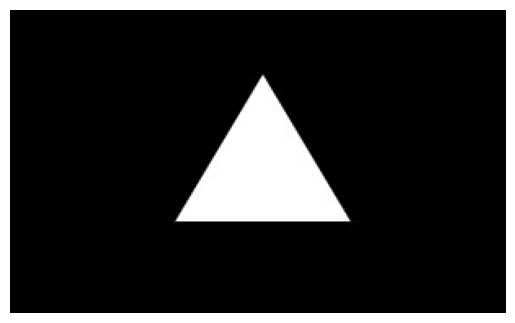

空心像素點長度 = 282, 實心像素點長度 = 4835
空心像素點
[[[154  41]]

 [[155  41]]

 [[154  42]]

 [[156  42]]

 [[153  43]]

 [[156  43]]

 [[152  44]]

 [[157  44]]

 [[152  45]]

 [[157  45]]

 [[151  46]]

 [[158  46]]

 [[151  47]]

 [[158  47]]

 [[150  48]]

 [[159  48]]

 [[149  49]]

 [[160  49]]

 [[149  50]]

 [[160  50]]

 [[148  51]]

 [[161  51]]

 [[148  52]]

 [[161  52]]

 [[147  53]]

 [[162  53]]

 [[146  54]]

 [[163  54]]

 [[146  55]]

 [[163  55]]

 [[145  56]]

 [[164  56]]

 [[145  57]]

 [[164  57]]

 [[144  58]]

 [[165  58]]

 [[143  59]]

 [[166  59]]

 [[143  60]]

 [[166  60]]

 [[142  61]]

 [[167  61]]

 [[142  62]]

 [[167  62]]

 [[141  63]]

 [[168  63]]

 [[140  64]]

 [[169  64]]

 [[140  65]]

 [[169  65]]

 [[139  66]]

 [[170  66]]

 [[139  67]]

 [[170  67]]

 [[138  68]]

 [[171  68]]

 [[137  69]]

 [[172  69]]

 [[137  70]]

 [[172  70]]

 [[136  71]]

 [[173  71]]

 [[136  72]]

 [[173  72]]

 [[135  73]]

 [[174  73]]

 [[134  74]]

 [[175  74]]

 [[134  75]]

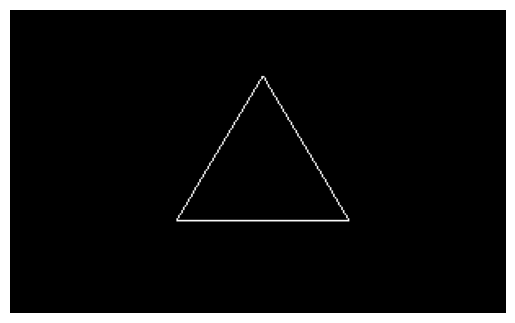

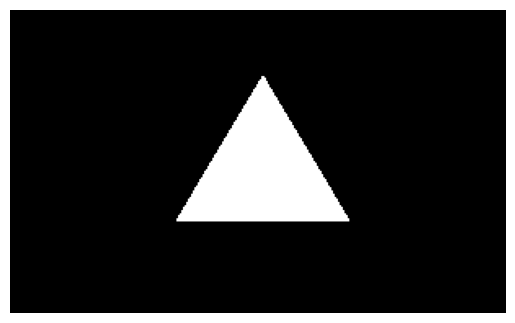

In [1]:
# 非0像素點座標資料
# 使用Numpy的findNonZero()函式
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread("simple.jpg")
cv2.imshow("src", src)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_LIST,
                               cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]                                     # 取得輪廓數據
mask1 = np.zeros(src_gray.shape, np.uint8)            # 建立畫布
dst1 = cv2.drawContours(mask1, [cnt], 0, 255, 1)      # 繪製空心輪廓
points1 = cv2.findNonZero(dst1)
mask2 = np.zeros(src_gray.shape, np.uint8)            # 建立畫布
dst2 = cv2.drawContours(mask2, [cnt], 0, 255, -1)     # 繪製實心輪廓
points2 = cv2.findNonZero(dst2)

print(f"空心像素點長度 = {len(points1)}, 實心像素點長度 = {len(points2)}")
print("空心像素點")
print(points1)
print("實心像素點")
print(points2)
cv2.imshow("dst1", dst1)
plt.axis("off")
plt.imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imshow("dst2", dst2)
plt.axis("off")
plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()


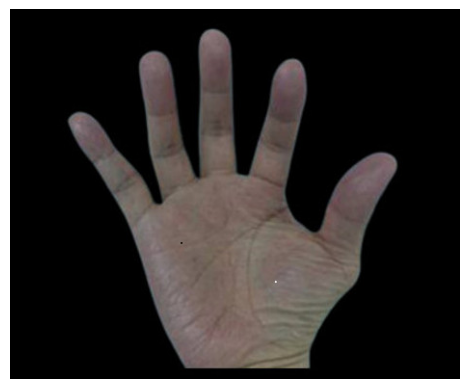

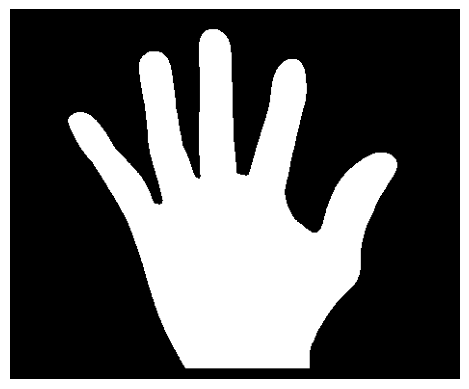

最小像素值 = 15.0
最小像素值座標 = (178, 242)
最大像素值 = 250.0
最大像素值座標 = (275, 283)


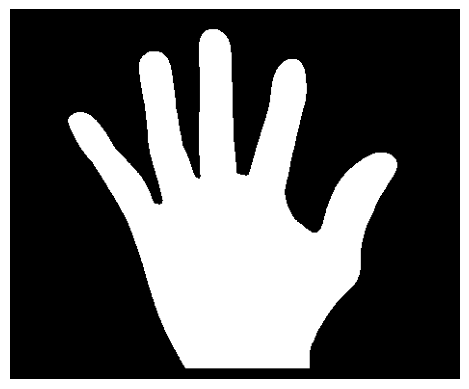

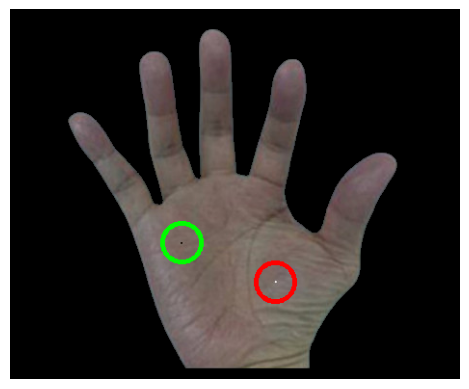

In [2]:
# 尋找影像物件中的像素最小值、最大值,以及他們的座標
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread("hand.jpg")
cv2.imshow("src", src)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, dst_binary = cv2.threshold(src_gray, 50, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(dst_binary,
                               cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]                                     # 取得輪廓數據
mask = np.zeros(src_gray.shape, np.uint8)             # 建立畫布
mask = cv2.drawContours(mask, [cnt], -1, (255, 255, 255), -1)
cv2.imshow("mask", mask)
plt.axis("off")
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()
# 在src_gray影像的mask遮罩區域尋找最大像素與最小像素值
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src_gray, mask=mask)
print(f"最小像素值 = {minVal}")
print(f"最小像素值座標 = {minLoc}")
print(f"最大像素值 = {maxVal}")
print(f"最大像素值座標 = {maxLoc}")
cv2.circle(src, minLoc, 20, [0, 255, 0], 3)           # 最小像素值用綠色圓
cv2.circle(src, maxLoc, 20, [0, 0, 255], 3)           # 最大像素值用紅色圓
# 建立遮罩未來可以顯示此感興趣的遮罩區域
mask1 = np.zeros(src.shape, np.uint8)
mask1 = cv2.drawContours(mask1, [cnt], -1, (255, 255, 255), -1)
cv2.imshow("mask1", mask1)
plt.axis("off")
plt.imshow(cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB))
plt.show()
dst = cv2.bitwise_and(src, mask1)
cv2.imshow("dst", dst)
plt.axis("off")
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()


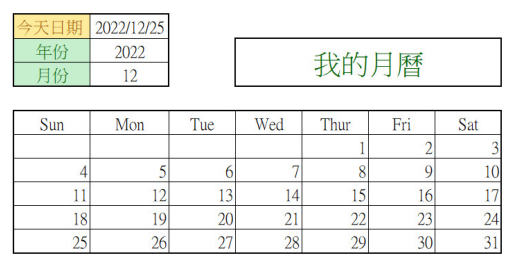

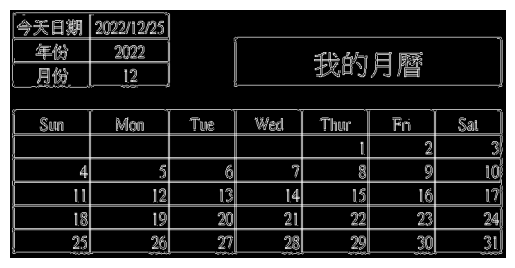

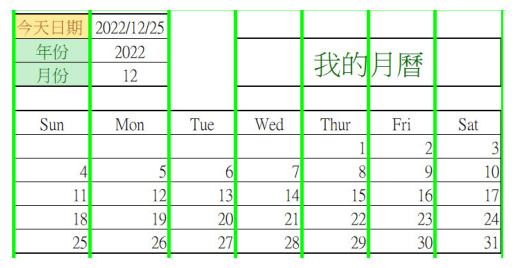

In [2]:
# 霍夫變換-HoughLines()函式
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread("calendar.jpg", cv2.IMREAD_COLOR)
cv2.imshow("src", src)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)        # 轉成灰階
edges = cv2.Canny(src_gray, 100, 200)                   # 使用Canny邊緣檢測
cv2.imshow("Canny", edges)                              # 顯示Canny邊緣線條
plt.axis("off")
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.show()
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)        # 檢測直線

# c繪製直線
for line in lines:
    rho, theta = line[0]                                # lines回傳
    a = np.cos(theta)                                   # cos(theta)
    b = np.sin(theta)                                   # sin(theta)
    x0 = rho * a
    y0 = rho * b
    x1 = int(x0 + 1000 * (-b))                          # 建立x1
    y1 = int(x0 + 1000 * (a))                           # 建立y1
    x2 = int(x0 - 1000 * (-b))                          # 建立x2
    y2 = int(x0 - 1000 * (a))                           # 建立y2
    cv2.line(src, (x1, y1), (x2, y2), (0, 255, 0), 2)   # 繪製綠色線條
cv2.imshow("dst", src)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()


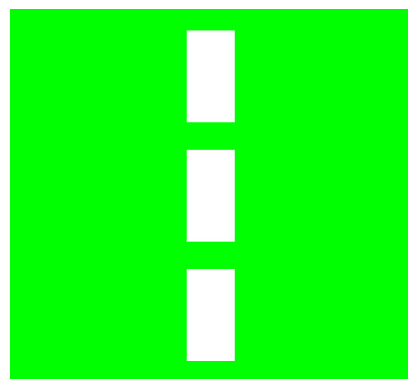

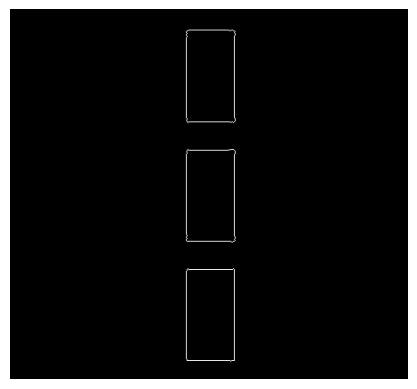

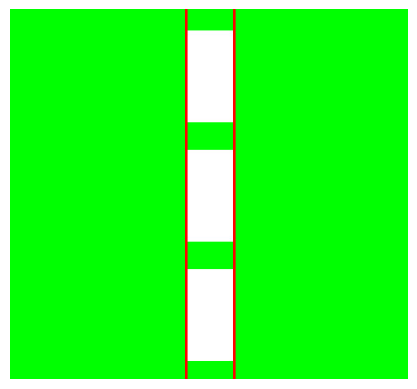

In [3]:
# 霍夫變換-HoughLines()函式
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread("lane.jpg", cv2.IMREAD_COLOR)
cv2.imshow("src", src)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)        # 轉成灰階
edges = cv2.Canny(src_gray, 100, 200)                   # 使用Canny邊緣檢測
cv2.imshow("Canny", edges)                              # 顯示Canny邊緣線條
plt.axis("off")
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.show()
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)        # 檢測直線

# c繪製直線
for line in lines:
    rho, theta = line[0]                                # lines回傳
    a = np.cos(theta)                                   # cos(theta)
    b = np.sin(theta)                                   # sin(theta)
    x0 = rho * a
    y0 = rho * b
    x1 = int(x0 + 1000 * (-b))                          # 建立x1
    y1 = int(x0 + 1000 * (a))                           # 建立y1
    x2 = int(x0 - 1000 * (-b))                          # 建立x2
    y2 = int(x0 - 1000 * (a))                           # 建立y2
    cv2.line(src, (x1, y1), (x2, y2), (0, 0, 255), 2)   # 繪製紅色線條
cv2.imshow("dst", src)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()


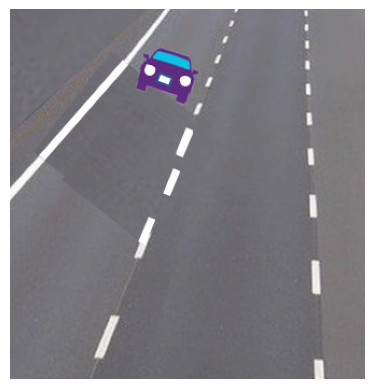

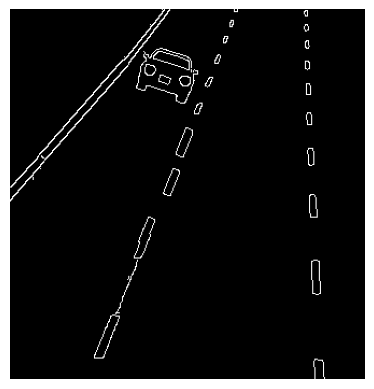

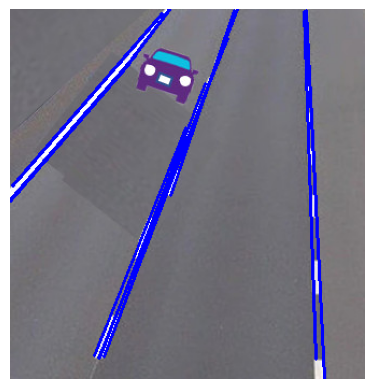

In [2]:
# 霍夫變換-HoughLinesP()函式
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread("roadtest.jpg", cv2.IMREAD_COLOR)
cv2.imshow("src", src)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)        # 轉成灰階
edges = cv2.Canny(src_gray, 50, 200)                    # 使用Canny邊緣檢測
cv2.imshow("Canny", edges)                              # 顯示Canny邊緣線條
plt.axis("off")
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.show()
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50,
                       minLineLength=10,
                       maxLineGap=100)                  # 檢測直線

# 繪製檢測到的直線
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(src, (x1, y1), (x2, y2), (255, 0, 0), 2)   # 繪製藍色線條
cv2.imshow("dst", src)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()


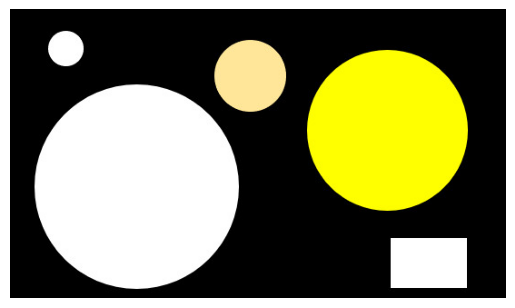

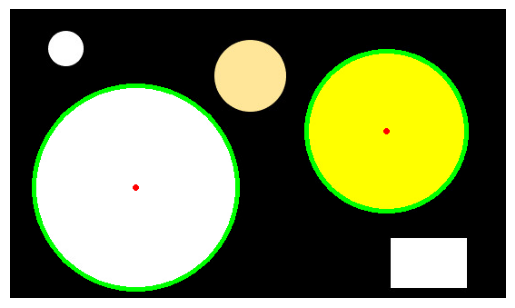

In [3]:
# 霍夫變換-HoughCircles()函式
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread("shapes.jpg", cv2.IMREAD_COLOR)
cv2.imshow("src", src)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
image = cv2.medianBlur(src, 5)                          # 過濾雜訊
src_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)      # 轉成灰階
circles = cv2.HoughCircles(src_gray, cv2.HOUGH_GRADIENT,
                           1, 100, param1=50, param2=30,
                           minRadius=70, maxRadius=200)
circles = np.uint(np.around(circles))                   # 轉成整數
# 繪製檢測到的直線
for c in circles[0]:
    x, y, r = c
    cv2.circle(src, (x, y), r, (0, 255, 0), 3)          # 繪製綠色圓外圈
    cv2.circle(src, (x, y), 2, (0, 0, 255), 2)          # 繪製紅色圓中心
cv2.imshow("dst", src)
plt.axis("off")
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()


檢測到的直線數量:7


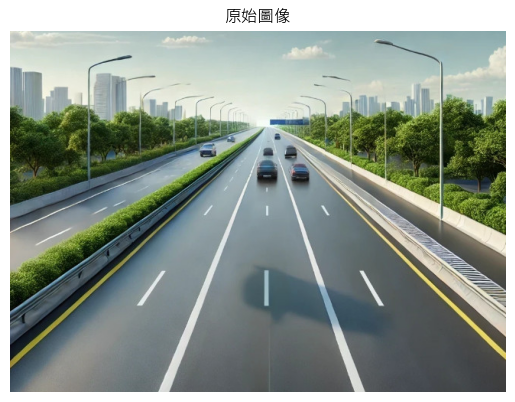

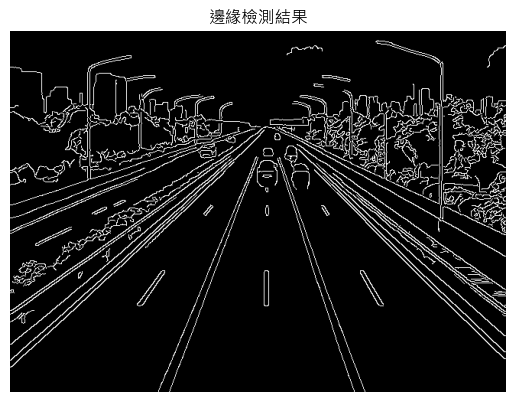

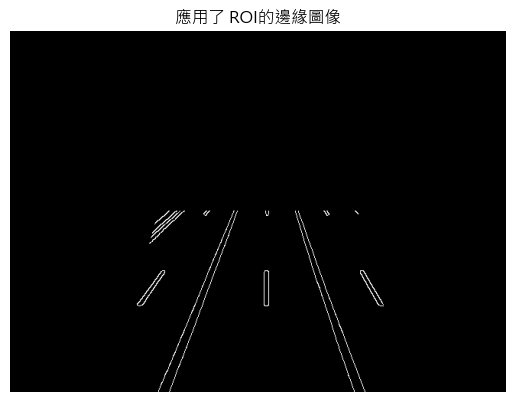

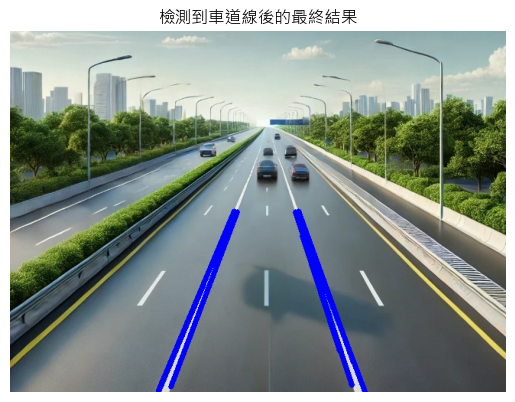

In [2]:
# 高速公路車道檢測
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 設置 Matplotlib 字體以支持中文顯示
# 建議使用你系統上已安裝的字體，例如 'Microsoft JhengHei'
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

# 解決 Matplotlib 在顯示中文時，負號 '-' 變成方塊的問題
plt.rcParams['axes.unicode_minus'] = False

# 讀取圖像
image = cv2.imread("highway.jpg")               # 從指定路徑讀取圖像

# 轉為灰階
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 高斯模糊, 減少邊緣檢測中的噪聲干擾
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Canny 圖像邊緣檢測, 50 和 150 是低閾值和高閾值, 決定那些邊緣被檢測到
edges = cv2.Canny(blurred, 50, 150)

# 定義感興趣區域 (ROI)
height, width = edges.shape                     # 獲取edges圖像的高度和寬度
mask = np.zeros_like(edges)                     # 建立與edges圖像大小相同的全黑遮罩
polygon = np.array([[                           # 定義多邊形作為感興趣區域 ROI
    (int(width * 0.2), height),                 # 左下角點
    (int(width * 0.8), height),                 # 右下角點
    (int(width * 0.7), int(height * 0.5)),      # 右上角點
    (int(width * 0.3), int(height * 0.5))       # 左上角點
]], dtype=np.int32)

# 將多邊形區域充填為白色, 其他區域保持為黑色
cv2.fillPoly(mask, polygon, 255)

# 將遮罩與邊緣圖像進行按位與操作, 保留感興趣區域內的邊緣
roi = cv2.bitwise_and(edges, mask)

# 霍夫直線檢測
lines = cv2.HoughLinesP(
    roi,
    rho=1,                  # 累積器單元的距離解析度(像素)
    theta=np.pi/180,        # 累積器單元的角度解析度(弧度)
    threshold=50,           # 霍夫變換的累積閾值
    minLineLength=80,       # 檢測的最小線段長度(像素)
    maxLineGap=50           # 允許連接的最大間隙(像素)
)
if lines is None:
    print("未檢測到任何直線")   # 如果未檢測到任何直線
else:
    print(f"檢測到的直線數量:{len(lines)}") # 輸出檢測到的直線數量

# 繪製檢測到的直線
output = np.copy(image)                    # 複製原始圖像, 用於繪製直線
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]            # 取得每條直線的兩個端點座標
        # 繪製藍色直線, 線寬為5
        cv2.line(output, (x1, y1), (x2, y2), (255, 0, 0), 5)

# 顯示結果
cv2.imshow('Original Image', image)         # 顯示原始圖像
cv2.imshow('Canny Edges', edges)            # 顯示邊緣檢測結果
cv2.imshow('Region of Interest', roi)       # 顯示應用了 ROI的邊緣圖像
cv2.imshow('Detected Lanes', output)        # 顯示檢測到車道線後的最終結果

# image = np.random.rand(100, 100, 3) * 255
# edges = np.random.rand(100, 100) * 255
# roi = np.random.rand(100, 100) * 255
# output = np.random.rand(100, 100, 3) * 255

# --- 簡化後的資料結構 ---

image_data = [
    {'title': '原始圖像', 'data': image},
    {'title': '邊緣檢測結果', 'data': edges},
    {'title': '應用了 ROI的邊緣圖像', 'data': roi},
    {'title': '檢測到車道線後的最終結果', 'data': output}
]

# --- 繪圖迴圈 ---

for item in image_data:
    img_array = item['data']
    title = item['title']
    
    if img_array is not None and img_array.size > 0:
        # 如果是灰階圖片
        if len(img_array.shape) == 2:
            plt.imshow(img_array, cmap='gray')
        # 如果是彩色圖片
        else:
            image_rgb = cv2.cvtColor(img_array.astype(np.uint8), cv2.COLOR_BGR2RGB)
            plt.imshow(image_rgb)
        
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print(f"圖片 '{title}' 無法顯示，陣列為空。")
cv2.waitKey(0)
cv2.destroyAllWindows()
